Import relevant Libraries

In [37]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
sns.set_style('whitegrid')

Read all files

In [38]:
# Major file, inside here we have id_major	id_university	type	major_name	capacity columns
majors = pd.read_csv('./files/majors.csv')
print(majors.isna().sum()) #check for some null 
majors.sample(5)

Unnamed: 0       0
id_major         0
id_university    0
type             0
major_name       0
capacity         0
dtype: int64


Unnamed: 0  id_major  id_university        type  \
2201        2201   3342193            334  humanities   
656          656   3511123            351     science   
2858        2858   6312074            631  humanities   
989          989   3811076            381     science   
86            86   1161033            116     science   

                    major_name  capacity  
2201  PENDIDIKAN BAHASA JERMAN        36  
656                KEPERAWATAN        40  
2858       BIMBINGAN KONSELING        68  
989                     FISIKA        40  
86                  ARSITEKTUR        48

In [39]:
# we have id_university and the name of the university 
universities = pd.read_csv('./files/universities.csv')
print(universities.isna().sum()) #check some null 
universities.sample(5)

Unnamed: 0         0
id_university      0
university_name    0
dtype: int64


Unnamed: 0  id_university                              university_name
73          73            722                    UNIVERSITAS NEGERI MANADO
70          70            712                  UNIVERSITAS NEGERI MAKASSAR
28          28            332                   INSTITUT TEKNOLOGI BANDUNG
32          32            336  UNIVERSITAS ISLAM NEGERI SUNAN GUNUNG DJATI
41          41            357           UNIVERSITAS ISLAM NEGERI WALISONGO

In [40]:
# in here we have all the test score from humanities
score_humanities = pd.read_csv('./files/score_humanities.csv')
print(score_humanities.isna().sum()) #check some null 
score_humanities.sample(5)

Unnamed: 0              0
id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
id_user                 0
score_eko               0
score_geo               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
score_sej               0
score_sos               0
dtype: int64


Unnamed: 0  id_first_major  id_first_university  id_second_major  \
16281       16281         3232077                  323          3232054   
50230       50230         3732067                  373          3562362   
22612       22612         3312035                  331          3312097   
53625       53625         3552135                  355          3722073   
49708       49708         3212235                  321          3222206   

       id_second_university  id_user  score_eko  score_geo  score_kmb  \
16281                   323   111208        326        504        556   
50230                   356   284650        421        598        808   
22612                   331   152004        461        469        460   
53625                   372   297090        630        642        471   
49708                   322   282753        483        510        388   

       score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos  
16281        486        549        650        474        482        554  
50230        560        616        423        509        497        517  
22612        385        429        363        499        559        479  
53625        570        540        613        709        585        511  
49708        481        599        355        524        614        506

In [41]:
# we have all the test score from science
score_science = pd.read_csv('./files/score_science.csv')
print(score_science.isna().sum()) #check some null 
score_science.sample(5)

Unnamed: 0              0
id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
id_user                 0
score_bio               0
score_fis               0
score_kim               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
dtype: int64


Unnamed: 0  id_first_major  id_first_university  id_second_major  \
67467       67467         3821032                  382          3731211   
64769       64769         3331172                  333          3331284   
57655       57655         1211046                  121          1211197   
10847       10847         3511107                  351          3711133   
14250       14250         3531166                  353          3511204   

       id_second_university  id_user  score_bio  score_fis  score_kim  \
67467                   373   267317        366        381        429   
64769                   333   256646        492        565        420   
57655                   121   230716        531        636        444   
10847                   371    53993        466        596        370   
14250                   351    67614        497        471        290   

       score_kmb  score_kpu  score_kua  score_mat  score_ppu  
67467        749        681        670        492        617  
64769        473        404        519        739        476  
57655        687        642        522        567        490  
10847        722        553        509        488        548  
14250        515        522        562        469        680

there is no missing data in any of these files, so we can continue to merge some files

In [42]:
major_univ = pd.merge(left=universities[['id_university','university_name']],right=majors[['id_major','major_name','id_university','capacity']],on='id_university')
major_univ # we have merged our data, so it will be easier to be read

id_university          university_name  id_major  \
0               111  UNIVERSITAS SYIAH KUALA   1111014   
1               111  UNIVERSITAS SYIAH KUALA   1111022   
2               111  UNIVERSITAS SYIAH KUALA   1111037   
3               111  UNIVERSITAS SYIAH KUALA   1111045   
4               111  UNIVERSITAS SYIAH KUALA   1111053   
...             ...                      ...       ...   
3162            921        UNIVERSITAS PAPUA   9212011   
3163            921        UNIVERSITAS PAPUA   9212042   
3164            921        UNIVERSITAS PAPUA   9212057   
3165            921        UNIVERSITAS PAPUA   9212065   
3166            921        UNIVERSITAS PAPUA   9212073   

                       major_name  capacity  
0         PENDIDIKAN DOKTER HEWAN        88  
1                    TEKNIK SIPIL        64  
2                    TEKNIK MESIN        48  
3                    TEKNIK KIMIA        48  
4                      ARSITEKTUR        48  
...                           ...       ...  
3162          EKONOMI PEMBANGUNAN        32  
3163                    MANAJEMEN        32  
3164                    AKUNTANSI        32  
3165  PENDIDIKAN BAHASA INDONESIA        16  
3166    PENDIDIKAN BAHASA INGGRIS        16  

[3167 rows x 5 columns]

for science data

In [43]:
df_science = pd.merge(left=score_science,right=major_univ,left_on=['id_first_major','id_first_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) # merge first major and first university
df_science = df_science.rename(columns={'university_name':'first_univ','major_name':'first_major','capacity':'first_capacity'}).drop(['id_university','id_major'],axis=1) # then rename the columns name that have been merged and also drop the id
df_science = pd.merge(left=df_science,right=major_univ,left_on=['id_second_major','id_second_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) #  now second major and second university
df_science = df_science.rename(columns={'university_name':'second_univ','major_name':'second_major','capacity':'second_capacity'}).drop(['id_university','id_major','Unnamed: 0','id_first_major','id_first_university','id_second_major','id_second_university','id_user'],axis=1) # same like before

In [44]:
df_science # now we can just use a single file to get all of the information

score_bio  score_fis  score_kim  score_kmb  score_kpu  score_kua  \
0            400        400        400        400        400        400   
1            704        447        630        561        518        541   
2            715        532        633        579        732        804   
3            446        511        400        548        679        567   
4            489        533        367        481        487        544   
...          ...        ...        ...        ...        ...        ...   
86223        336        466        476        511        378        393   
86224        520        483        654        545        606        722   
86225        435        413        441        408        516        526   
86226        482        516        453        546        569        597   
86227        466        494        562        593        591        547   

       score_mat  score_ppu                    first_univ  \
0            400        400    INSTITUT TEKNOLOGI BANDUNG   
1            585        599    INSTITUT TEKNOLOGI BANDUNG   
2            402        608    INSTITUT TEKNOLOGI BANDUNG   
3            513        538    INSTITUT TEKNOLOGI BANDUNG   
4            499        469    INSTITUT TEKNOLOGI BANDUNG   
...          ...        ...                           ...   
86223        589        470  UNIVERSITAS NEGERI GORONTALO   
86224        425        495    UNIVERSITAS BORNEO TARAKAN   
86225        564        390       UNIVERSITAS SYIAH KUALA   
86226        587        633      UNIVERSITAS PALANGKARAYA   
86227        552        543      UNIVERSITAS NUSA CENDANA   

                                      first_major  first_capacity  \
0      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              64   
1      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              64   
2      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              64   
3      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              64   
4      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              64   
...                                           ...             ...   
86223                         PENDIDIKAN GEOGRAFI              54   
86224                                  AKUAKULTUR              48   
86225             AGROTEKNOLOGI (PSDKU GAYO LUES)              20   
86226                                       KIMIA              30   
86227                                 PEND. KIMIA              68   

                        second_univ                      second_major  \
0           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
1           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
2           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
3           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
4           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
...                             ...                               ...   
86223  UNIVERSITAS NEGERI GORONTALO  PENDIDIKAN ILMU PENGETAHUAN ALAM   
86224    UNIVERSITAS BORNEO TARAKAN                        AGRIBISNIS   
86225       UNIVERSITAS SYIAH KUALA       KEHUTANAN (PSDKU GAYO LUES)   
86226      UNIVERSITAS PALANGKARAYA                            FISIKA   
86227      UNIVERSITAS NUSA CENDANA              PEND. TEKNIK ELEKTRO   

       second_capacity  
0                   80  
1                   80  
2                   80  
3                   80  
4                   80  
...                ...  
86223               27  
86224               48  
86225               16  
86226               30  
86227               36  

[86228 rows x 14 columns]

In [45]:
# because the capacity of utbk is 40% from the maximum capacity so we need to change the capacity value
df_science['first_capacity'] = df_science['first_capacity'].apply(lambda x: int(x*40/100))
df_science['second_capacity'] = df_science['second_capacity'].apply(lambda x: int(x*40/100))

In [46]:
df_science['specialized_score']=df_science[['score_bio','score_fis','score_kim','score_mat']].mean(axis=1) #get avg score 
df_science['general_score'] = df_science[['score_kmb','score_kpu','score_kua','score_ppu']].mean(axis=1)  #get avg score
df_science['average_score'] = df_science.iloc[:,:8].mean(axis=1) # avg score

In [47]:
df_science.columns.values

array(['score_bio', 'score_fis', 'score_kim', 'score_kmb', 'score_kpu',
       'score_kua', 'score_mat', 'score_ppu', 'first_univ', 'first_major',
       'first_capacity', 'second_univ', 'second_major', 'second_capacity',
       'specialized_score', 'general_score', 'average_score'],
      dtype=object)

In [48]:
df_science = df_science[['score_bio', 'score_fis', 'score_kim','score_mat', 'score_kmb', 'score_kpu','score_kua', 'score_ppu','specialized_score','general_score','average_score','first_univ', 'first_major','first_capacity', 'second_univ', 'second_major', 'second_capacity']] #rearrange columns index 

In [49]:
df_science

score_bio  score_fis  score_kim  score_mat  score_kmb  score_kpu  \
0            400        400        400        400        400        400   
1            704        447        630        585        561        518   
2            715        532        633        402        579        732   
3            446        511        400        513        548        679   
4            489        533        367        499        481        487   
...          ...        ...        ...        ...        ...        ...   
86223        336        466        476        589        511        378   
86224        520        483        654        425        545        606   
86225        435        413        441        564        408        516   
86226        482        516        453        587        546        569   
86227        466        494        562        552        593        591   

       score_kua  score_ppu  specialized_score  general_score  average_score  \
0            400        400             400.00         400.00        400.000   
1            541        599             591.50         554.75        573.125   
2            804        608             570.50         680.75        625.625   
3            567        538             467.50         583.00        525.250   
4            544        469             472.00         495.25        483.625   
...          ...        ...                ...            ...            ...   
86223        393        470             466.75         438.00        452.375   
86224        722        495             520.50         592.00        556.250   
86225        526        390             463.25         460.00        461.625   
86226        597        633             509.50         586.25        547.875   
86227        547        543             518.50         568.50        543.500   

                         first_univ  \
0        INSTITUT TEKNOLOGI BANDUNG   
1        INSTITUT TEKNOLOGI BANDUNG   
2        INSTITUT TEKNOLOGI BANDUNG   
3        INSTITUT TEKNOLOGI BANDUNG   
4        INSTITUT TEKNOLOGI BANDUNG   
...                             ...   
86223  UNIVERSITAS NEGERI GORONTALO   
86224    UNIVERSITAS BORNEO TARAKAN   
86225       UNIVERSITAS SYIAH KUALA   
86226      UNIVERSITAS PALANGKARAYA   
86227      UNIVERSITAS NUSA CENDANA   

                                      first_major  first_capacity  \
0      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
1      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
2      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
3      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
4      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
...                                           ...             ...   
86223                         PENDIDIKAN GEOGRAFI              21   
86224                                  AKUAKULTUR              19   
86225             AGROTEKNOLOGI (PSDKU GAYO LUES)               8   
86226                                       KIMIA              12   
86227                                 PEND. KIMIA              27   

                        second_univ                      second_major  \
0           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
1           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
2           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
3           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
4           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
...                             ...                               ...   
86223  UNIVERSITAS NEGERI GORONTALO  PENDIDIKAN ILMU PENGETAHUAN ALAM   
86224    UNIVERSITAS BORNEO TARAKAN                        AGRIBISNIS   
86225       UNIVERSITAS SYIAH KUALA       KEHUTANAN (PSDKU GAYO LUES)   
86226      UNIVERSITAS PALANGKARAYA                            FISIKA   
86227      UNIVERSITAS NUSA CENDANA         

for humanities data

In [50]:
df_humanites = pd.merge(left=score_humanities,right=major_univ,left_on=['id_first_major','id_first_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) # merge first major and first university
df_humanites = df_humanites.rename(columns={'university_name':'first_univ','major_name':'first_major','capacity':'first_capacity'}).drop(['id_university','id_major'],axis=1) # then rename the columns name that have been merged and also drop the id
df_humanites = pd.merge(left=df_humanites,right=major_univ,left_on=['id_second_major','id_second_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) #  now second major and second university
df_humanites = df_humanites.rename(columns={'university_name':'second_univ','major_name':'second_major','capacity':'second_capacity'}).drop(['id_university','id_major','Unnamed: 0','id_first_major','id_first_university','id_second_major','id_second_university','id_user'],axis=1) # same like before

In [51]:
df_humanites.head(3)

score_eko  score_geo  score_kmb  score_kpu  score_kua  score_mat  \
0        778        486        679        594        643        686   
1        803        638        659        696        685        494   
2        601        560        575        611        629        509   

   score_ppu  score_sej  score_sos                  first_univ  \
0        559        392        676  INSTITUT TEKNOLOGI BANDUNG   
1        576        676        694  INSTITUT TEKNOLOGI BANDUNG   
2        607        775        629  INSTITUT TEKNOLOGI BANDUNG   

                           first_major  first_capacity  \
0  FAKULTAS SENIRUPA DAN DESAIN (FSRD)             100   
1  FAKULTAS SENIRUPA DAN DESAIN (FSRD)             100   
2  FAKULTAS SENIRUPA DAN DESAIN (FSRD)             100   

                 second_univ              second_major  second_capacity  
0  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               30  
1  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               30  
2  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               30

In [52]:
# because the capacity of utbk is 40% from the maximum capacity so we need to change the capacity value
df_humanites['first_capacity'] = df_humanites['first_capacity'].apply(lambda x: int(x*40/100))
df_humanites['second_capacity'] = df_humanites['second_capacity'].apply(lambda x: int(x*40/100))

In [53]:
df_humanites.columns

Index(['score_eko', 'score_geo', 'score_kmb', 'score_kpu', 'score_kua',
       'score_mat', 'score_ppu', 'score_sej', 'score_sos', 'first_univ',
       'first_major', 'first_capacity', 'second_univ', 'second_major',
       'second_capacity'],
      dtype='object')

In [54]:
df_humanites['specialized_score']=df_humanites[['score_eko','score_geo','score_sej','score_sos']].mean(axis=1) #get avg score 
df_humanites['general_score'] = df_humanites[['score_kmb','score_kpu','score_kua','score_ppu','score_mat']].mean(axis=1)  #get avg score
df_humanites['average_score'] = df_humanites.iloc[:,:8].mean(axis=1) # avg score

In [55]:
df_humanites = df_humanites[['score_eko', 'score_geo', 'score_sej','score_sos','score_mat', 'score_kmb', 'score_kpu','score_kua', 'score_ppu','specialized_score','general_score','average_score','first_univ', 'first_major','first_capacity', 'second_univ', 'second_major', 'second_capacity']] #rearrange columns index 

In [56]:
df_humanites.head()

score_eko  score_geo  score_sej  score_sos  score_mat  score_kmb  \
0        778        486        392        676        686        679   
1        803        638        676        694        494        659   
2        601        560        775        629        509        575   
3        612        494        617        548        548        524   
4        493        573        474        560        641        586   

   score_kpu  score_kua  score_ppu  specialized_score  general_score  \
0        594        643        559             583.00          632.2   
1        696        685        576             702.75          622.0   
2        611        629        607             641.25          586.2   
3        549        589        508             567.75          543.6   
4        582        504        608             525.00          584.2   

   average_score                  first_univ  \
0        602.125  INSTITUT TEKNOLOGI BANDUNG   
1        653.375  INSTITUT TEKNOLOGI BANDUNG   
2        608.375  INSTITUT TEKNOLOGI BANDUNG   
3        555.125  INSTITUT TEKNOLOGI BANDUNG   
4        557.625  INSTITUT TEKNOLOGI BANDUNG   

                           first_major  first_capacity  \
0  FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
1  FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
2  FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
3  FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
4  FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   

                 second_univ              second_major  second_capacity  
0  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               12  
1  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               12  
2  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               12  
3  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               12  
4  UNIVERSITAS SEBELAS MARET  DESAIN KOMUNIKASI VISUAL               12

visualization

In [57]:
a = df_science.drop(['second_univ',	'second_major',	'second_capacity'],axis=1).groupby('first_univ').size().sort_values(ascending=False).reset_index().head(10).rename(columns={0:'Total','first_univ':'Universities'}) #DF for science

b = df_humanites.drop(['second_univ',	'second_major',	'second_capacity'],axis=1).groupby('first_univ').size().sort_values(ascending=False).reset_index().head(10).rename(columns={0:'Total','first_univ':'Universities'}) #DF for humanit

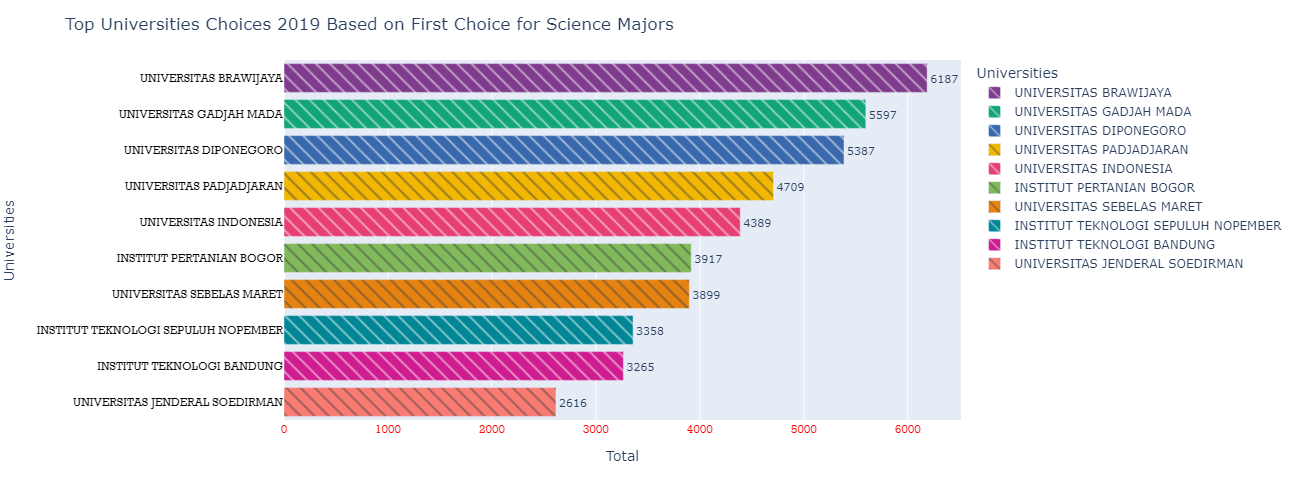

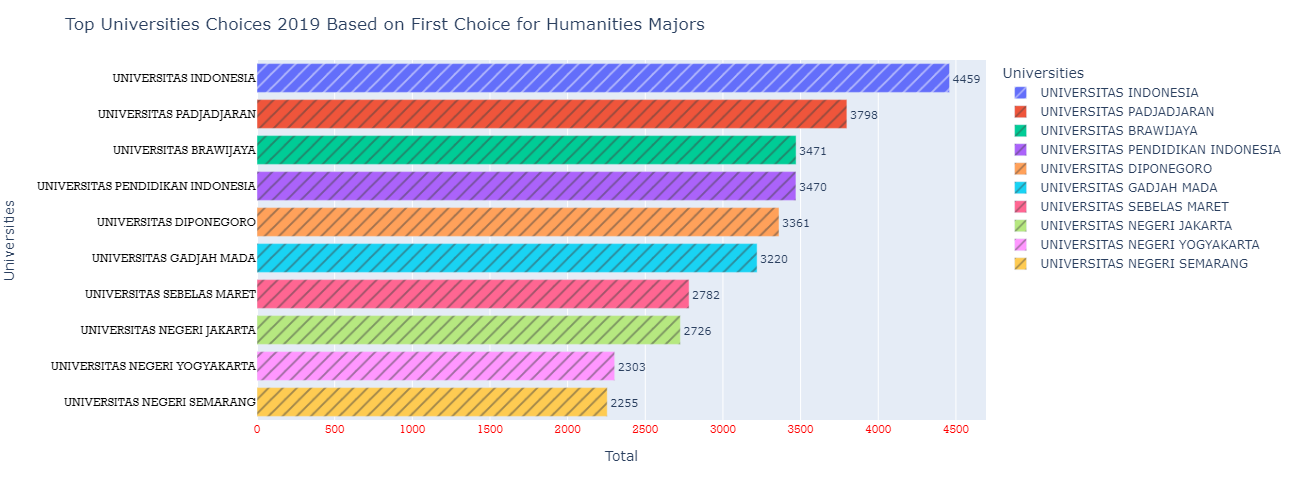

In [58]:
fig = px.bar(data_frame=a,y='Universities',x='Total',color='Universities',text_auto=True,pattern_shape_sequence=["\\"],width=1300, color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(title='Top Universities Choices 2019 Based on First Choice for Science Majors')
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=12))
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=12))
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True)
fig.show('png')

fig = px.bar(data_frame=b,y='Universities',x='Total',color='Universities',text_auto=True,pattern_shape_sequence=["/"],width=1300)
fig.update_layout(title='Top Universities Choices 2019 Based on First Choice for Humanities Majors')
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=12))
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=12))
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True)
fig.show('png')

![Top Universities Choices 2019 Based on First Choice for Science Majors](photos/Top%20Universities%20Choices%202019%20Based%20on%20First%20Choice%20for%20Science%20Majors.png)`

![Top Universities Choices 2019 Based on First Choice for Humanities Majors](photos/Top%20Universities%20Choices%202019%20Based%20on%20First%20Choice%20for%20Humanities%20Majors.png)

In [59]:
df_univ_brawSc = df_science.loc[(df_science['first_univ']=='UNIVERSITAS BRAWIJAYA')].drop(['second_univ',	'second_major'	,'second_capacity'],axis=1)
df_univ_brawHu = df_humanites.loc[(df_humanites['first_univ']=='UNIVERSITAS BRAWIJAYA')].drop(['second_univ',	'second_major'	,'second_capacity'],axis=1)

In [60]:
a = df_univ_brawSc.groupby('first_major').agg({'first_univ':'count','first_capacity':'mean'}).sort_values('first_univ',ascending=True).reset_index().rename(columns={'first_univ':'Total choices','first_capacity':'Capacity'})
b = df_univ_brawHu.groupby('first_major').agg({'first_univ':'count','first_capacity':'mean'}).sort_values('first_univ',ascending=True).reset_index().rename(columns={'first_univ':'Total choices','first_capacity':'Capacity'})

In [61]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(values=[len(a),len(b)],names=['Science Major','Humanities Major'],height=500,width=700,hole=.2)
fig.update_traces(textposition='inside', textinfo='value+label',hoverinfo='label+percent',marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title='Total Majors in UB')
fig.show()

![Total Majors](photos/Total%20Majors.png))

In [62]:
#science
fig = px.bar(data_frame=a,y='first_major',x=['Capacity','Total choices'],barmode='group',height=1400,text_auto=True,pattern_shape_sequence=["x"],)
fig.update_layout(title='UB Science majors based on the first choice 2019',xaxis_title='',yaxis_title='Majors')
fig.update_traces(textfont_size=36, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

#humanities
fig = px.bar(data_frame=b,y='first_major',x=['Capacity','Total choices'],barmode='group',height=1000,text_auto=True,pattern_shape_sequence=["x"],color_discrete_map={
        'Total choicess': 'purple',
        'some_other_group': 'green'
    })
fig.update_layout(title='UB Humanities majors based on the first choice 2019',xaxis_title='',yaxis_title='Majors')
fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=True)
fig.show()

![UB Science majors based on the first choice 2019](photos/UB%20Science%20majors%20based%20on%20the%20first%20choice%202019.png)

!['UB Humanities majors based on the first choice 2019'](photos/UB%20Humanities%20majors%20based%20on%20the%20first%20choice%202019.png)

In [63]:
a['Percentage'] = (a['Capacity']/a['Total choices'])*100
a['Percentage'] = a['Percentage'].apply(lambda x: f"{x:.3f}")
a = a.sort_values('Percentage',ascending=True,ignore_index=True)
b['Percentage'] = (b['Capacity']/b['Total choices'])*100
b['Percentage'] = b['Percentage'].apply(lambda x: f"{x:.3f}")
b = b.sort_values('Percentage',ascending=True,ignore_index=True)

In [64]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(values=[9.091,9.639,10.870,11.290,11.515,12.556,12.821,13.270,13.913,13.990],names=['ILMU GIZI','PENDIDIKAN DOKTER GIGI','PENDIDIKAN DOKTER','TEKNIK SIPIL','FARMASI','PERENCANAAN WILAYAH & KOTA','TEKNIK LINGKUNGAN','ARSITEKTUR','TEKNIK INDUSTRI','ILMU DAN TEKNOLOGI PANGAN'],height=600,width=1000)
fig.update_traces(textposition='inside', textinfo='value+label',marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(title='Percentage Strictest Science Majors')
fig.show()

fig = px.pie(values=b['Percentage'].head(10),names=b['first_major'].head(10),height=600,width=1000)
fig.update_traces(textposition='inside', textinfo='value+label',marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title='Percentage Strictest Humanities Majors')
fig.show()

![Percentage Strictest Science Majors](photos/Percentage%20Strictest%20Science%20Majors.png)

![Percentage Strictest Humanities Majors](photos/Percentage%20Strictest%20Humanities%20Majors.png)

![Science Major UB Top Choices 2019](/photos/Science%20Major%20UB%20Top%20Choices%202019.png)

In [65]:
df_univ_brawSc.columns

Index(['score_bio', 'score_fis', 'score_kim', 'score_mat', 'score_kmb',
       'score_kpu', 'score_kua', 'score_ppu', 'specialized_score',
       'general_score', 'average_score', 'first_univ', 'first_major',
       'first_capacity'],
      dtype='object')

In [66]:
def find_the_lowest_score(df):
    df_out = pd.DataFrame()
    for key,subdf in df.sort_values('average_score',ascending=False).groupby('first_major'):
        capacity = subdf['first_capacity'].iloc[0]
        data = subdf['average_score'].iloc[:capacity]
        data_specialized_score = subdf['specialized_score'].iloc[:capacity]
        data_general_score = subdf['general_score'].iloc[:capacity]
        major = subdf['first_major'].iloc[:capacity]
        data = pd.concat([data_general_score,data_specialized_score,data,major,],axis=1)
        t = pd.DataFrame(data)
        df_out = pd.concat([df_out,t],ignore_index=True)
    return df_out

In [67]:
df_univ_brawSc_clear = find_the_lowest_score(df_univ_brawSc)
df_univ_brawHm_clear = find_the_lowest_score(df_univ_brawHu)

In [68]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_univ_brawSc_clear['specialized_score'], name='specialized_score',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=df_univ_brawSc_clear['general_score'], name = 'general_score',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df_univ_brawSc_clear['average_score'], name = 'average_score',
                marker_color = 'mediumvioletred'))
fig.update_layout(title_text='UB Distribution scores for Science Major 2019')
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(y=df_univ_brawHm_clear['specialized_score'], name='specialized_score',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=df_univ_brawHm_clear['general_score'], name = 'general_score',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df_univ_brawHm_clear['average_score'], name = 'average_score',
                marker_color = 'mediumvioletred'))
fig.update_layout(title_text='UB Distribution scores for Humanities Major 2019')
fig.show()

![UB Distribution scores for Science Major 2019](/photos/UB%20Distribution%20scores%202019.png)

![UB Distribution scores for Humanities Major 2019](photos/UB%20Distribution%20scores%20for%20Humanities%20Major%202019.png)

In [69]:
df_humanites

score_eko  score_geo  score_sej  score_sos  score_mat  score_kmb  \
0            778        486        392        676        686        679   
1            803        638        676        694        494        659   
2            601        560        775        629        509        575   
3            612        494        617        548        548        524   
4            493        573        474        560        641        586   
...          ...        ...        ...        ...        ...        ...   
60989        287        423        453        457        498        488   
60990        469        541        572        435        618        578   
60991        612        455        434        501        527        482   
60992        511        351        616        373        493        417   
60993        465        506        471        347        522        308   

       score_kpu  score_kua  score_ppu  specialized_score  general_score  \
0            594        643        559             583.00          632.2   
1            696        685        576             702.75          622.0   
2            611        629        607             641.25          586.2   
3            549        589        508             567.75          543.6   
4            582        504        608             525.00          584.2   
...          ...        ...        ...                ...            ...   
60989        447        501        428             405.00          472.4   
60990        416        446        331             504.25          477.8   
60991        453        408        447             500.50          463.4   
60992        412        463        434             462.75          443.8   
60993        385        459        406             447.25          416.0   

       average_score                    first_univ  \
0            602.125    INSTITUT TEKNOLOGI BANDUNG   
1            653.375    INSTITUT TEKNOLOGI BANDUNG   
2            608.375    INSTITUT TEKNOLOGI BANDUNG   
3            555.125    INSTITUT TEKNOLOGI BANDUNG   
4            557.625    INSTITUT TEKNOLOGI BANDUNG   
...              ...                           ...   
60989        440.625      UNIVERSITAS NUSA CENDANA   
60990        496.375  UNIVERSITAS NEGERI GORONTALO   
60991        477.250      UNIVERSITAS PALANGKARAYA   
60992        462.125          UNIVERSITAS TADULAKO   
60993        440.250           UNIVERSITAS KHAIRUN   

                                     first_major  first_capacity  \
0            FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
1            FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
2            FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
3            FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
4            FAKULTAS SENIRUPA DAN DESAIN (FSRD)              40   
...                                          ...             ...   
60989                        BIMBINGAN KONSELING              27   
60990  PENDIDIKAN JASMANI KESEHATAN DAN REKREASI              36   
60991                     PENDIDIKAN SENDRATASIK               9   
60992                                  SOSIOLOGI              42   
60993                         ANTROPOLOGI SOSIAL               6   

                        second_univ  \
0         UNIVERSITAS SEBELAS MARET   
1         UNIVERSITAS SEBELAS MARET   
2         UNIVERSITAS SEBELAS MARET   
3         UNIVERSITAS SEBELAS MARET   
4         UNIVERSITAS SEBELAS MARET   
...                             ...   
60989      UNIVERSITAS NUSA CENDANA   
60990  UNIVERSITAS NEGERI GORONTALO   
60991      UNIVERSITAS PALANGKARAYA   
60992          UNIVERSITAS TADULAKO   
60993           UNIVERSITAS KHAIRUN   

                                    second_major  second_capacity  
0                       DESAIN KOMUNIKASI VISUAL               12  
1                       DESAIN KOMUNIKASI VISUAL               12  
2                       DESAIN KOMUNIKASI VISUAL      

In [70]:
df_science

score_bio  score_fis  score_kim  score_mat  score_kmb  score_kpu  \
0            400        400        400        400        400        400   
1            704        447        630        585        561        518   
2            715        532        633        402        579        732   
3            446        511        400        513        548        679   
4            489        533        367        499        481        487   
...          ...        ...        ...        ...        ...        ...   
86223        336        466        476        589        511        378   
86224        520        483        654        425        545        606   
86225        435        413        441        564        408        516   
86226        482        516        453        587        546        569   
86227        466        494        562        552        593        591   

       score_kua  score_ppu  specialized_score  general_score  average_score  \
0            400        400             400.00         400.00        400.000   
1            541        599             591.50         554.75        573.125   
2            804        608             570.50         680.75        625.625   
3            567        538             467.50         583.00        525.250   
4            544        469             472.00         495.25        483.625   
...          ...        ...                ...            ...            ...   
86223        393        470             466.75         438.00        452.375   
86224        722        495             520.50         592.00        556.250   
86225        526        390             463.25         460.00        461.625   
86226        597        633             509.50         586.25        547.875   
86227        547        543             518.50         568.50        543.500   

                         first_univ  \
0        INSTITUT TEKNOLOGI BANDUNG   
1        INSTITUT TEKNOLOGI BANDUNG   
2        INSTITUT TEKNOLOGI BANDUNG   
3        INSTITUT TEKNOLOGI BANDUNG   
4        INSTITUT TEKNOLOGI BANDUNG   
...                             ...   
86223  UNIVERSITAS NEGERI GORONTALO   
86224    UNIVERSITAS BORNEO TARAKAN   
86225       UNIVERSITAS SYIAH KUALA   
86226      UNIVERSITAS PALANGKARAYA   
86227      UNIVERSITAS NUSA CENDANA   

                                      first_major  first_capacity  \
0      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
1      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
2      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
3      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
4      SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS              25   
...                                           ...             ...   
86223                         PENDIDIKAN GEOGRAFI              21   
86224                                  AKUAKULTUR              19   
86225             AGROTEKNOLOGI (PSDKU GAYO LUES)               8   
86226                                       KIMIA              12   
86227                                 PEND. KIMIA              27   

                        second_univ                      second_major  \
0           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
1           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
2           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
3           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
4           UNIVERSITAS PADJADJARAN                         PSIKOLOGI   
...                             ...                               ...   
86223  UNIVERSITAS NEGERI GORONTALO  PENDIDIKAN ILMU PENGETAHUAN ALAM   
86224    UNIVERSITAS BORNEO TARAKAN                        AGRIBISNIS   
86225       UNIVERSITAS SYIAH KUALA       KEHUTANAN (PSDKU GAYO LUES)   
86226      UNIVERSITAS PALANGKARAYA                            FISIKA   
86227      UNIVERSITAS NUSA CENDANA         

In [71]:
def find_the_lowest_score2(df):
    df_out = pd.DataFrame()
    for key,subdf in df.sort_values('average_score',ascending=False).groupby('first_major'):
        capacity = subdf['first_capacity'].iloc[0]
        data = subdf['score_sej'].iloc[:capacity]
        data_score_eko = subdf['score_eko'].iloc[:capacity]
        data_score_geo = subdf['score_geo'].iloc[:capacity]
        data_score_mat = subdf['score_mat'].iloc[:capacity]
        data_score_kmb = subdf['score_kmb'].iloc[:capacity]
        data_score_kpu = subdf['score_kpu'].iloc[:capacity]
        data_score_kua = subdf['score_kua'].iloc[:capacity]
        data_score_ppu = subdf['score_ppu'].iloc[:capacity]
        major = subdf['score_sos'].iloc[:capacity]
        data = pd.concat([data_score_geo,data_score_eko,data,major,data_score_mat,data_score_kmb,data_score_kpu,data_score_ppu,data_score_kua],axis=1)
        t = pd.DataFrame(data)
        df_out = pd.concat([df_out,t],ignore_index=True)
    return df_out

In [72]:
def find_the_lowest_score3(df):
    df_out = pd.DataFrame()
    for key,subdf in df.sort_values('average_score',ascending=False).groupby('first_major'):
        capacity = subdf['first_capacity'].iloc[0]
        data = subdf['score_bio'].iloc[:capacity]
        data_score_eko = subdf['score_fis'].iloc[:capacity]
        data_score_geo = subdf['score_kim'].iloc[:capacity]
        data_score_mat = subdf['score_mat'].iloc[:capacity]
        data_score_kmb = subdf['score_kmb'].iloc[:capacity]
        data_score_kpu = subdf['score_kpu'].iloc[:capacity]
        data_score_kua = subdf['score_kua'].iloc[:capacity]
        data_score_ppu = subdf['score_ppu'].iloc[:capacity]
        data = pd.concat([data_score_geo,data_score_eko,data,data_score_mat,data_score_kmb,data_score_kpu,data_score_ppu,data_score_kua],axis=1)
        t = pd.DataFrame(data)
        df_out = pd.concat([df_out,t],ignore_index=True)
    return df_out

In [73]:
df_distHm = find_the_lowest_score2(df_humanites)
df_distSc = find_the_lowest_score3(df_science)

In [74]:
fig = px.box(data_frame=df_distHm,y=df_distHm.columns.values,color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Distribution Each Subject in Humanities',xaxis_title='')
fig.show()

fig = px.box(data_frame=df_distSc,y=df_distSc.columns.values,color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title='Distribution Each Subject in Science',xaxis_title='')
fig.show()

![Distribution Each Subject in Humanities](photos/Distribution%20Each%20Subject%20in%20Humanities.png)

![Distribution Each Subject in Scence](photos/Distribution%20Each%20Subject%20in%20Science.png)

In [75]:
fig = px.bar(data_frame=df_univ_brawSc_clear.groupby('first_major').mean().reset_index().sort_values('average_score',ascending=False),x='average_score',y='first_major',color='first_major',height=1200,width=1200,text_auto=True,color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(showlegend=False,title='Avg Score in Science Majors UB 2019',xaxis_title='Avg Score',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1)
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=True)
fig.show()

fig = px.bar(data_frame=df_univ_brawHm_clear.groupby('first_major').mean().reset_index().sort_values('average_score',ascending=False),x='average_score',y='first_major',color='first_major',height=1000,width=1000,text_auto=True,color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(showlegend=False,title='Avg Score in Humanities Majors UB 2019',xaxis_title='Avg Score',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1)
# fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

![Avg Score in Science Majors UB 2019](/photos/Avg%20Score%20in%20Science%20Majors%20UB%202019.png)

![Avg Score in Humanities Majors UB 2019](photos/Avg%20Score%20in%20Humanities%20Majors%20UB%202019.png)

In [76]:
fig = px.bar(data_frame=df_univ_brawSc_clear.groupby('first_major').mean().sort_values('average_score',ascending=False).head(5).reset_index(),x=['average_score','specialized_score','general_score'],y='first_major',text_auto=True,barmode='group',height=500)

fig.update_layout(showlegend=True,title='Top 5 Avg Score Science Majors 2019',xaxis_title='Avg Scores',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1,yaxis={'categoryorder':'total ascending'})
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=12))
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=12))
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True)
fig.show()

fig = px.bar(data_frame=df_univ_brawHm_clear.groupby('first_major').mean().sort_values('average_score',ascending=False).head(5).reset_index(),x=['average_score','specialized_score','general_score'],y='first_major',text_auto=True,barmode='group',height=500)

fig.update_layout(showlegend=True,title='Top 5 Avg Score Humanities Majors 2019',xaxis_title='Avg Scores',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1,yaxis={'categoryorder':'total ascending'})
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=11))
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=11))
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True)
fig.show()

![Top 5 Avg Score Science Majors 2019](photos/Top%205%20Avg%20Score%20Science%20Majors%202019.png)

![Top 5 Avg Score Humanities Majors 2019](photos/Top%205%20Avg%20Score%20Humanities%20Majors%202019.png)

In [77]:
df_univ_braw_dokter = df_univ_brawSc_clear.loc[df_univ_brawSc_clear['first_major']=='PENDIDIKAN DOKTER'].sort_values(by=['average_score','specialized_score','general_score'],ascending=False)

df_univ_braw_akuntansi = df_univ_brawHm_clear.loc[df_univ_brawHm_clear['first_major']=='AKUNTANSI'].sort_values(by=['average_score','specialized_score','general_score'],ascending=False)

In [78]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True,subplot_titles=('Highest Scores','Lowest Scores'))

fig.add_trace(
    go.Bar(y=df_univ_braw_dokter.loc[:,'average_score',].iloc[:5],name='Highest Score',text=df_univ_braw_dokter.loc[:,'average_score'].iloc[:5],
            marker=dict(color=[1, 1, 1,1,1])),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=df_univ_braw_dokter.loc[:,'average_score'].iloc[-5:],name='Lowest Score',text=df_univ_braw_dokter.loc[:,'average_score'].iloc[-5:],
            marker=dict(color=['green', 'green', 'green','green','green'])),
    row=1, col=2,
)
fig.update_layout(title_text='Medical UB Avg Scores ',showlegend=False,)
iplot(fig)


fig = make_subplots(rows=1, cols=2, shared_yaxes=True,subplot_titles=('Highest Scores','Lowest Scores'))

fig.add_trace(
    go.Bar(y=df_univ_braw_akuntansi.loc[:,'average_score',].iloc[:5],name='Highest Score',text=df_univ_braw_akuntansi.loc[:,'average_score'].iloc[:5]),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=df_univ_braw_akuntansi.loc[:,'average_score'].iloc[-5:],name='Lowest Score',text=df_univ_braw_akuntansi.loc[:,'average_score'].iloc[-5:]),
    row=1, col=2,
)
fig.update_layout(title_text='Akuntansi UB Avg Scores',showlegend=False,)
iplot(fig)



# fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=14))

![Medical School UB Avg Scores 2019](/photos/Medical%20School%20UB%20Avg%20Scores%202019.png)

![Akuntansi UB Avg Scores](photos/Akuntansi%20UB%20Avg%20Scores.png)